In [13]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [14]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
len(train_labels)

60000

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
len(test_labels)

10000

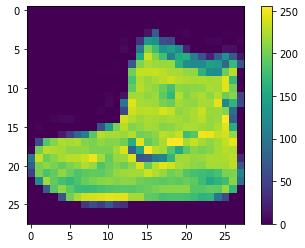

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

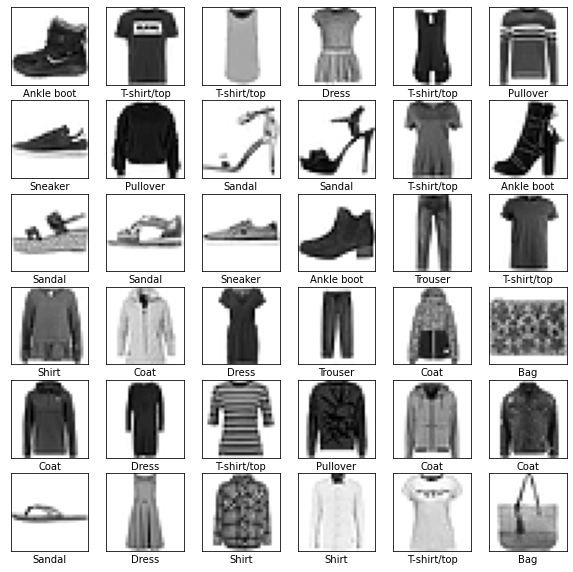

In [22]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 961us/step - loss: 0.4961 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.3743 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.3337 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 2s 823us/step - loss: 0.3106 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 2s 832us/step - loss: 0.2913 - accuracy: 0.8939


In [26]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3548 - accuracy: 0.8715

테스트 정확도: 0.8715000152587891


In [27]:

predictions = model.predict(test_images)

In [28]:
predictions[0]

array([7.0037058e-06, 1.9100469e-08, 8.6380696e-06, 1.7980059e-06,
       2.7753582e-05, 5.1772548e-03, 2.1680429e-05, 8.1276201e-02,
       1.3070066e-05, 9.1346651e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

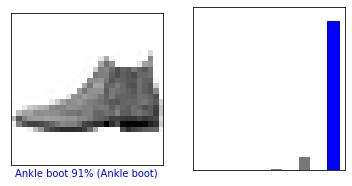

In [32]:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

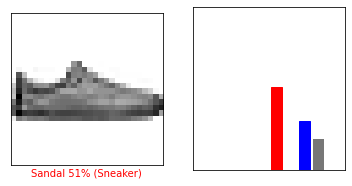

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

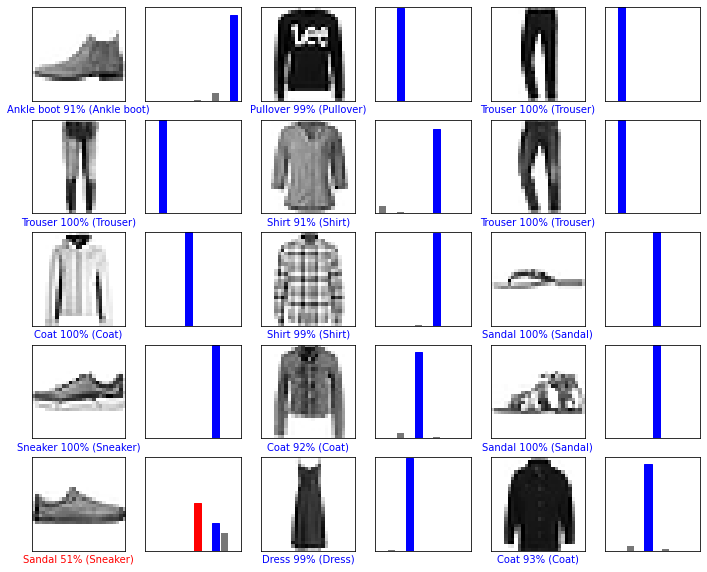

In [34]:

# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [35]:

# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [36]:

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:

predictions_single = model.predict(img)

print(predictions_single)

[[7.00371356e-06 1.91004705e-08 8.63805417e-06 1.79800440e-06
  2.77536128e-05 5.17726084e-03 2.16804328e-05 8.12761858e-02
  1.30700555e-05 9.13466632e-01]]


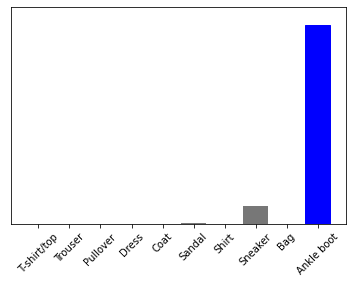

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [39]:

np.argmax(predictions_single[0])

9